### Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ['Male','Female']
income = ['Poor','Middle Class','Rich'] #Dos categorias a trabajar

In [3]:
n = 500 #500 elementos o datos aleatorios de las categorias a trabajar
gender_data = []
income_data = []

for i in range(500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
# N(m,s) -> m + s*Z (m-> Media, s-> Desviación estandar)
height = 160 + 30*np.random.randn(n) #Media 1.60 m masmenos 30 cm
weight = 55 + 30*np.random.randn(n) #Media 55 kg mas menos 30 kg
age = 30 + 12*np.random.randn(n)
income = 1800 + 3500*np.random.randn(n)

In [5]:
data = pd.DataFrame({ #Dummie Data set
    'Gender': gender_data,
    'Economic Status': income_data, 
    'Height': height,
    'Weight':weight,
    'Age': age,
    'Income': income
})

In [6]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,134.291469,76.786734,25.072893,925.111587
1,Female,Middle Class,185.652292,88.395998,29.404946,8423.184125
2,Female,Middle Class,201.612961,45.507317,26.533631,1208.265381
3,Male,Middle Class,141.297568,29.567528,16.021441,-3464.366331
4,Female,Rich,141.106720,105.366777,36.501787,5291.747012


 ### Agrupación de datos

In [8]:
grouped_gender = data.groupby('Gender') #Crea un onejto que contiene dos atributos, nombre y el grupo

In [9]:
grouped_gender.groups #Muestra en que fila son Female y Male del data set

{'Female': Int64Index([  1,   2,   4,   5,   6,   7,   8,  12,  14,  18,
             ...
             482, 483, 485, 486, 487, 489, 490, 495, 497, 499],
            dtype='int64', length=259),
 'Male': Int64Index([  0,   3,   9,  10,  11,  13,  15,  16,  17,  20,
             ...
             480, 481, 484, 488, 491, 492, 493, 494, 496, 498],
            dtype='int64', length=241)}

In [10]:
for names,groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
1    Female    Middle Class  185.652292   88.395998  29.404946   8423.184125
2    Female    Middle Class  201.612961   45.507317  26.533631   1208.265381
4    Female            Rich  141.106720  105.366777  36.501787   5291.747012
5    Female            Poor  187.162601   13.572803  39.391944   9349.906713
6    Female            Rich  125.070877   66.780613  47.061953   -580.457242
7    Female            Poor  184.062121   85.436312  31.967422   7368.436285
8    Female            Rich  225.398453   18.670461  41.016927   4446.307584
12   Female            Rich  135.898382   86.392724  18.042824   4279.162673
14   Female            Poor  200.395535   45.349015  28.657436  -5226.683474
18   Female    Middle Class  151.175795   32.426751  47.594905   1878.296556
19   Female            Rich  154.704735   48.787766  31.345696  -4249.093756
21   Female    Middle Class  122.137590   69.465444  28.902024  -1152

In [12]:
grouped_gender.get_group('Male').head() #Solo aparece los que tiene Gender = Male

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,134.291469,76.786734,25.072893,925.111587
3,Male,Middle Class,141.297568,29.567528,16.021441,-3464.366331
9,Male,Rich,148.701549,64.882717,31.795473,4974.015320
10,Male,Poor,177.934028,72.215434,38.595842,3811.049071
11,Male,Poor,168.410715,47.144405,32.385895,8946.910472


In [13]:
#Agrupación por más de una categoria
double_group = data.groupby(['Gender','Economic Status'])

In [14]:
len(double_group) #6 grupos 2 Gender x 3 Economic Status

6

In [15]:
for names,groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age       Income
1    Female    Middle Class  185.652292   88.395998  29.404946  8423.184125
2    Female    Middle Class  201.612961   45.507317  26.533631  1208.265381
18   Female    Middle Class  151.175795   32.426751  47.594905  1878.296556
21   Female    Middle Class  122.137590   69.465444  28.902024 -1152.214810
26   Female    Middle Class  198.801135   58.840087  36.690463  2323.016801
28   Female    Middle Class  177.935375   77.478503  38.290606 -1155.041203
29   Female    Middle Class  160.715307   52.234904  35.942583 -3665.681426
37   Female    Middle Class  149.348310   72.548545  35.011233   150.897870
38   Female    Middle Class  172.399269   90.259472  20.733294  5524.187768
44   Female    Middle Class  125.289656   58.545561  26.828891  -166.226199
51   Female    Middle Class  142.189462   51.866972  27.883616  2385.656546
54   Female    Middle Class  169.258365   62.262157  21.75718

### Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age         Income
Gender Economic Status                                                       
Female Middle Class     12504.953224  4107.664562  2322.567817   95868.708386
       Poor             14971.428967  5019.320226  2715.534077  211110.670037
       Rich             13997.728727  4764.558031  2701.920531  181633.784144
Male   Middle Class     11992.937001  4320.492683  2251.689011  156314.305360
       Poor             14791.628355  4990.768880  2644.559804  157305.587137
       Rich             11951.945969  4120.353306  2099.372720  104967.455721

In [18]:
double_group.mean()

Height     Weight        Age       Income
Gender Economic Status                                               
Female Middle Class     160.319913  52.662366  29.776510  1229.086005
       Poor             160.983107  53.971185  29.199291  2270.007205
       Rich             159.065099  54.142705  30.703642  2064.020274
Male   Middle Class     159.905827  57.606569  30.022520  2084.190738
       Poor             160.778569  54.247488  28.745215  1709.843338
       Rich             161.512783  55.680450  28.369902  1418.479131

In [17]:
double_group.size()

Gender  Economic Status
Female  Middle Class       78
        Poor               93
        Rich               88
Male    Middle Class       75
        Poor               92
        Rich               74
dtype: int64

In [19]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      78.0  160.319913  27.694143  97.959745  142.840518   
       Poor              93.0  160.983107  30.059278  71.665838  141.669381   
       Rich              88.0  159.065099  26.063309  88.925142  141.330585   
Male   Middle Class      75.0  159.905827  30.102869  92.942120  141.497846   
       Poor              92.0  160.778569  30.108254  70.510144  138.770024   
       Rich              74.0  161.512783  32.895535  87.149551  134.805998   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     159.703099  184.610472  214.625231   78.0  52.662366   
       Poor             164.439963  182.819316  222.017706   93.0  53.971185   
       Rich             158.908939  172.091716  225.971625   88.0  54.142705   
Male   Middle Class     161.882045  179.530441  229.706607   75.0  57.606569   
       Poor             154.824884  183.000471  228.495842   92.0  54.247488   
       Rich             161.893581  185.347718  224.004834   74.0  55.680450   

                        ...        Age            Income               \
                        ...        75%        max  count         mean   
Gender Economic Status  ...                                             
Female Middle Class     ...  36.794085  53.862504   78.0  1229.086005   
       Poor             ...  38.755096  56.849261   93.0  2270.007205   
       Rich             ...  40.348964  52.846690   88.0  2064.020274   
Male   Middle Class     ...  36.987118  65.018642   75.0  2084.190738   
       Poor             ...  37.241702  56.757841   92.0  1709.843338   
       Rich             ...  36.835984  51.402239   74.0  1418.479131   

                                                                            \
                                std          min          25%          50%   
Gender Economic Status                                                       
Female Middle Class     2962.494255 -5958.046106  -931.267441  1229.564170   
       Poor             3621.472811 -6543.057179    19.938035  1815.892992   
       Rich             3644.689153 -5763.230915  -575.461288  2314.976423   
Male   Middle Class     3775.824356 -6883.413318  -130.270807  1934.806850   
       Poor             3640.280117 -8597.104301  -375.124996  1510.245115   
       Rich             3924.821976 -7597.572980 -1037.923016  1257.062683   

                                                   
                                75%           max  
Gender Economic Status                             
Female Middle Class     2926.302396   8423.184125  
       Poor             5074.317018   9634.483224  
       Rich             4463.180266  15134.013671  
Male   Middle Class     4224.715379  14481.708582  
       Poor             3889.971142   9927.809381  
       Rich             3842.002880  12376.981737  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group['Income']

In [21]:
grouped_income.describe()

count         mean          std          min  \
Gender Economic Status                                                 
Female Middle Class      78.0  1229.086005  2962.494255 -5958.046106   
       Poor              93.0  2270.007205  3621.472811 -6543.057179   
       Rich              88.0  2064.020274  3644.689153 -5763.230915   
Male   Middle Class      75.0  2084.190738  3775.824356 -6883.413318   
       Poor              92.0  1709.843338  3640.280117 -8597.104301   
       Rich              74.0  1418.479131  3924.821976 -7597.572980   

                                25%          50%          75%           max  
Gender Economic Status                                                       
Female Middle Class     -931.267441  1229.564170  2926.302396   8423.184125  
       Poor               19.938035  1815.892992  5074.317018   9634.483224  
       Rich             -575.461288  2314.976423  4463.180266  15134.013671  
Male   Middle Class     -130.270807  1934.806850  4224.715379  14481.708582  
       Poor             -375.124996  1510.245115  3889.971142   9927.809381  
       Rich            -1037.923016  1257.062683  3842.002880  12376.981737

In [22]:
double_group.aggregate({
    'Income':np.sum,
    'Age': np.mean,
    'Height':np.std
})

Income        Age     Height
Gender Economic Status                                     
Female Middle Class      95868.708386  29.776510  27.694143
       Poor             211110.670037  29.199291  30.059278
       Rich             181633.784144  30.703642  26.063309
Male   Middle Class     156314.305360  30.022520  30.102869
       Poor             157305.587137  28.745215  30.108254
       Rich             104967.455721  28.369902  32.895535

In [23]:
double_group.aggregate({
    'Age':np.mean,
    'Height': lambda h: np.mean(h)/np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     29.776510  5.826416
       Poor             29.199291  5.384549
       Rich             30.703642  6.138002
Male   Middle Class     30.022520  5.347751
       Poor             28.745215  5.369277
       Rich             28.369902  4.943384

In [24]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12504.953224  160.319913  27.694143  4107.664562   
       Poor             14971.428967  160.983107  30.059278  5019.320226   
       Rich             13997.728727  159.065099  26.063309  4764.558031   
Male   Middle Class     11992.937001  159.905827  30.102869  4320.492683   
       Poor             14791.628355  160.778569  30.108254  4990.768880   
       Rich             11951.945969  161.512783  32.895535  4120.353306   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     52.662366  28.566437  2322.567817  29.776510   
       Poor             53.971185  35.885545  2715.534077  29.199291   
       Rich             54.142705  31.728678  2701.920531  30.703642   
Male   Middle Class     57.606569  31.314316  2251.689011  30.022520   
       Poor             54.247488  28.827198  2644.559804  28.745215   
       Rich             55.680450  27.101700  2099.372720  28.369902   

                                          Income                            
                              std            sum         mean          std  
Gender Economic Status                                                      
Female Middle Class     10.972630   95868.708386  1229.086005  2962.494255  
       Poor             13.333704  211110.670037  2270.007205  3621.472811  
       Rich             11.733615  181633.784144  2064.020274  3644.689153  
Male   Middle Class     12.404361  156314.305360  2084.190738  3775.824356  
       Poor             11.665482  157305.587137  1709.843338  3640.280117  
       Rich             12.888107  104967.455721  1418.479131  3924.821976

In [25]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.826416  1.855437  2.731272  0.417568
       Poor             5.384549  1.512133  2.201755  0.630216
       Rich             6.138002  1.716207  2.631721  0.569554
Male   Middle Class     5.347751  1.852012  2.436618  0.555700
       Poor             5.369277  1.892128  2.477628  0.472275
       Rich             4.943384  2.068524  2.216272  0.363879

### Filtrado de Datos

In [30]:
double_group['Age'].filter(lambda x: x.sum() > 2400)

0      25.072893
4      36.501787
5      39.391944
6      47.061953
7      31.967422
8      41.016927
10     38.595842
11     32.385895
12     18.042824
14     28.657436
19     31.345696
23     30.991470
24     46.085188
25     24.807602
27     21.943818
30     21.354220
31     42.046233
32     18.864232
33     30.638985
34      9.129254
35     21.714259
36     12.684727
39     19.549041
40     26.315972
41     44.090126
43     40.156190
46      4.235346
47     23.639525
48     12.493864
49     38.766848
         ...    
443    26.415425
445    48.805410
446    33.221822
449    24.970998
451    29.387517
452    21.912765
453    34.786123
455    52.846690
457    48.465946
460    14.169642
464    20.783949
465    15.209903
466    35.089534
467    37.532757
468    39.592665
471    44.154432
472    51.588913
473    27.316111
474    15.427228
477    21.408648
479    25.099317
482    42.862989
485    41.909687
486    48.065993
490    35.118220
491    34.980379
492    28.582109
496    33.2440

### Transformación de variables

In [33]:
zscore = lambda x: (x-x.mean())/x.std() #Para cada columna le resto la media y la devido en la desviación estandar

In [35]:
z_gropu = double_group.transform(zscore) #Datos normalizados, la transformación fue normalizar los datos

In [36]:
import matplotlib.pyplot as plt

(array([  2.,   6.,  30.,  59.,  94., 122., 108.,  51.,  25.,   3.]),
 array([-3.33064271, -2.71545087, -2.10025903, -1.48506718, -0.86987534,
        -0.2546835 ,  0.36050835,  0.97570019,  1.59089203,  2.20608388,
         2.82127572]),
 <a list of 10 Patch objects>)

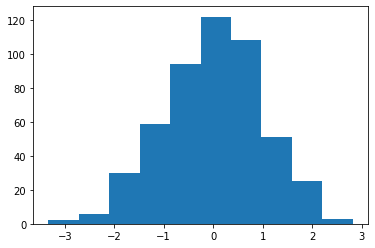

In [37]:
plt.hist(z_gropu['Age'])

In [40]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [42]:
double_group.transform(fill_na_mean).head() #Transformación de llenar los campos Na con la media de la columa

,Height,Weight,Age,Income
0,134.291469,76.786734,25.072893,925.111587
1,185.652292,88.395998,29.404946,8423.184125
2,201.612961,45.507317,26.533631,1208.265381
3,141.297568,29.567528,16.021441,-3464.366331
4,141.106720,105.366777,36.501787,5291.747012


### Operaciones diversas muy útiles

In [43]:
double_group.head(1) #Primera fila de cada uno de los 6 grupos

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,134.291469,76.786734,25.072893,925.111587
1,Female,Middle Class,185.652292,88.395998,29.404946,8423.184125
3,Male,Middle Class,141.297568,29.567528,16.021441,-3464.366331
4,Female,Rich,141.106720,105.366777,36.501787,5291.747012
5,Female,Poor,187.162601,13.572803,39.391944,9349.906713
9,Male,Rich,148.701549,64.882717,31.795473,4974.015320


In [44]:
double_group.tail(1) #Ultima fila de cada uno de los 6 grupos 

,Gender,Economic Status,Height,Weight,Age,Income
494,Male,Rich,158.487290,50.148178,42.636003,3452.570624
495,Female,Middle Class,110.926801,35.809667,49.138354,-1806.928982
496,Male,Poor,135.132709,31.933531,33.244002,2863.246836
497,Female,Poor,171.415434,105.692430,35.099082,6324.879078
498,Male,Middle Class,190.693772,119.025520,35.329407,-2436.082304
499,Female,Rich,220.708572,21.970062,45.363341,1955.717351


In [45]:
double_group.nth(32) #La 32 fila de cada uno de los grupos

Height     Weight        Age       Income
Gender Economic Status                                               
Female Middle Class     214.625231  30.701588  14.929969  2162.987520
       Poor             133.361229  72.055763  34.258011  5915.521068
       Rich             137.727423  74.227727  33.281567  3968.475290
Male   Middle Class     161.397654  65.903394  41.219992  1107.209961
       Poor             134.613439  78.584821  39.740589  3524.123457
       Rich             142.494111  29.162894  33.047325  3760.473714

In [46]:
data_sorted = data.sort_values(['Age','Income']) #Ordenar primero por Edad y luego por ingresos

In [47]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
186,Male,Rich,112.057742,34.164128,-14.555778,-1034.692712
241,Female,Poor,136.750384,34.878309,-5.224397,-45.576936
414,Male,Middle Class,187.233877,65.315443,-4.828905,1864.128156
206,Male,Rich,142.940369,86.402857,0.529659,-3374.488030
399,Male,Rich,176.530406,123.783325,1.433829,-2692.587640
252,Female,Poor,175.398667,19.801115,2.383069,-184.876130
404,Male,Middle Class,115.314179,71.389183,2.844353,113.148732
359,Female,Poor,110.714057,69.681041,3.545417,100.573654
318,Female,Poor,95.880881,23.086474,4.020603,4346.739988
381,Male,Poor,220.947498,60.873266,4.125812,962.409426


In [48]:
age_groped = data_sorted.groupby('Gender') #Agrupar por edad pero se muestran los mas jovenes

In [49]:
age_groped.head()

,Gender,Economic Status,Height,Weight,Age,Income
186,Male,Rich,112.057742,34.164128,-14.555778,-1034.692712
241,Female,Poor,136.750384,34.878309,-5.224397,-45.576936
414,Male,Middle Class,187.233877,65.315443,-4.828905,1864.128156
206,Male,Rich,142.940369,86.402857,0.529659,-3374.488030
399,Male,Rich,176.530406,123.783325,1.433829,-2692.587640
252,Female,Poor,175.398667,19.801115,2.383069,-184.876130
404,Male,Middle Class,115.314179,71.389183,2.844353,113.148732
359,Female,Poor,110.714057,69.681041,3.545417,100.573654
318,Female,Poor,95.880881,23.086474,4.020603,4346.739988
46,Female,Poor,194.454468,111.715661,4.235346,5845.602405


In [50]:
age_groped.head(1) #Los mas jovenes de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
186,Male,Rich,112.057742,34.164128,-14.555778,-1034.692712
241,Female,Poor,136.750384,34.878309,-5.224397,-45.576936


In [51]:
age_groped.tail(1) #Los mas viejos de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
277,Female,Poor,149.169873,21.828968,56.849261,-847.834464
299,Male,Middle Class,108.290654,39.032504,65.018642,1291.389690


##  Conjunto de entrenamiento y conjunto de testing

In [52]:
import pandas as pd

In [53]:
data = pd.read_csv('python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')

In [55]:
len(data)

3333

### Dividir utilizando la distribución normal

In [57]:
a = np.random.randn(len(data))

(array([  5.,  15.,  87., 288., 772., 898., 725., 393., 127.,  23.]),
 array([-4.01907707, -3.29841519, -2.57775331, -1.85709144, -1.13642956,
        -0.41576768,  0.3048942 ,  1.02555607,  1.74621795,  2.46687983,
         3.1875417 ]),
 <a list of 10 Patch objects>)

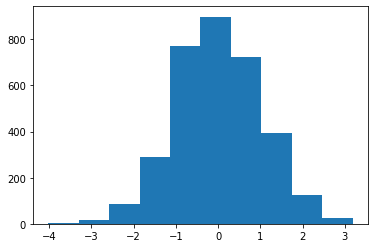

In [58]:
plt.hist(a)

In [59]:
check = (a < 0.8) #Datos de training

In [60]:
check

array([False,  True,  True, ...,  True,  True, False])

(array([ 742.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2591.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

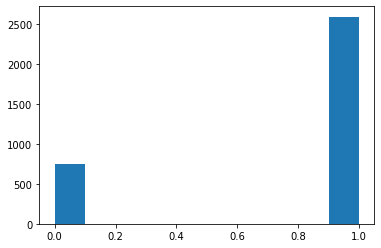

In [64]:
plt.hist(check.astype('int64'))

In [65]:
training = data[check]
testing = data[~check]

In [66]:
len(training) # 80%

2591

In [67]:
len(testing) # 20%

742

### Con sklearn, libreria estandar de machine learning

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train,test = train_test_split(data,test_size = 0.2)

In [71]:
len(train)

2666

In [72]:
len(test)

667

### Usando función shuffle

In [73]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [74]:
import sklearn

In [77]:
data = sklearn.utils.shuffle(data) #Aleatorizar los datos

In [78]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data=data[cut_id+1:]

In [79]:
len(train_data)

2499

In [80]:
len(test_data)

833